In [1]:
# !pip install imblearn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [2]:
from collections import Counter

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    classification_report,
    auc
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

# Data Loading

In [3]:
df = pd.read_csv(r"C:\Users\happy\Downloads\dataset\creditcarddata.csv")

# Data Overview

In [4]:
df.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [5]:
df.shape

(9709, 20)

> There are $9709$ rows and $20$ columns in the data.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

>   - There is no null value in this dataset.
>   - **Target** is the response column.
>   - There are $5$ columns of *text* data-type and others are *numeric*.

In [7]:
df.nunique()

ID                 9709
Gender                2
Own_car               2
Own_property          2
Work_phone            2
Phone                 2
Email                 2
Unemployed            2
Num_children          9
Num_family           10
Account_length       61
Total_income        263
Age                7172
Years_employed     3637
Income_type           5
Education_type        5
Family_status         5
Housing_type          6
Occupation_type      19
Target                2
dtype: int64

>   - Most of the columns seems to be **categorical** in nature as *the number of unique values in these columns are very less*.
>   - The columns where *number of unique values is 2*, seems to be **binary** in nature.

In [8]:
df.describe()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target
count,9.709000e+03,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9.709000e+03,9709.000000,9709.000000,9709.000000
mean,5.076105e+06,0.348749,0.367700,0.671542,0.217427,0.287671,0.087548,0.174683,0.422804,2.182614,27.270059,1.812282e+05,43.784093,5.664730,0.132145
std,4.080270e+04,0.476599,0.482204,0.469677,0.412517,0.452700,0.282650,0.379716,0.767019,0.932918,16.648057,9.927731e+04,11.625768,6.342241,0.338666
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.700000e+04,20.504186,0.000000,0.000000
25%,5.036955e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,1.125000e+05,34.059563,0.928150,0.000000
50%,5.069449e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,26.000000,1.575000e+05,42.741466,3.761884,0.000000
75%,5.112986e+06,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,41.000000,2.250000e+05,53.567151,8.200031,0.000000
max,5.150479e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,20.000000,60.000000,1.575000e+06,68.863837,43.020733,1.000000


# Exploratory Data Analysis

In [9]:
df1 = df.copy()
df1.Target.replace(to_replace = 0, value = "Not Eligible", inplace = True)
df1.Target.replace(to_replace = 1, value = "Eligible", inplace = True)

In [10]:
df1.groupby("Education_type")["Total_income"].mean().sort_values(ascending = False)

Education_type
Academic degree                  247500.000000
Higher education                 220841.661172
Incomplete higher                199431.266846
Secondary / secondary special    166545.160405
Lower secondary                  135532.894737
Name: Total_income, dtype: float64

>   - The **Education Type** column seems to be ordinal in nature.
>   - The **Education Type** and **Total_income** columns are positively correlated.

In [11]:
df.groupby("Occupation_type")["Total_income"].mean().sort_values(ascending = False)

Occupation_type
Managers                 276028.216113
IT staff                 216450.000000
Realty agents            211781.250000
Accountants              203420.175000
Drivers                  202070.947030
HR staff                 195954.545455
Private service staff    194703.488372
High skill tech staff    191292.857143
Core staff               186171.100912
Laborers                 175121.183005
Security staff           170572.252747
Sales staff              166590.084463
Secretaries              165521.739130
Waiters/barmen staff     162675.000000
Other                    162437.490481
Medicine staff           160539.556701
Cooking staff            147383.160622
Cleaning staff           146635.273973
Low-skill Laborers       134490.566038
Name: Total_income, dtype: float64

In [12]:
df.groupby("Income_type")["Total_income"].mean().sort_values(ascending = False)

Income_type
Commercial associate    211983.125216
State servant           195241.780471
Working                 176909.575101
Pensioner               146369.741530
Student                 139500.000000
Name: Total_income, dtype: float64

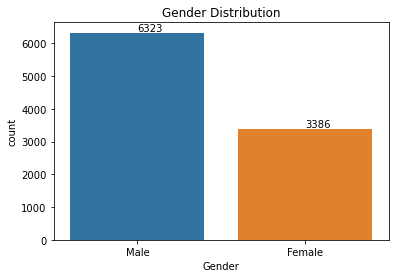

In [13]:
sns.countplot(x = "Gender", data = df1)
plt.xticks(ticks = [0, 1], labels = ["Male", "Female"])
for i, v in enumerate(df["Gender"].value_counts().values):
    plt.text(i, v + 60, str(v))
plt.title("Gender Distribution")
plt.show()

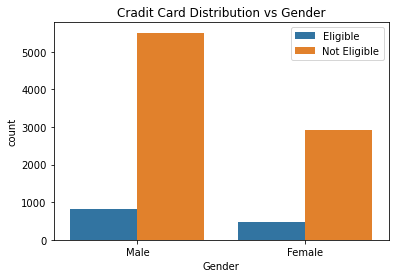

In [14]:
sns.countplot(x = "Gender", hue = "Target", data = df1)
plt.title("Cradit Card Distribution vs Gender")
plt.xticks(ticks = [0, 1], labels = ["Male", "Female"])
plt.legend()
plt.show()

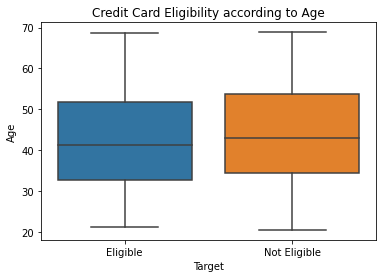

In [15]:
sns.boxplot(y = "Age", x = "Target", orient = "v", data = df1)
plt.title("Credit Card Eligibility according to Age")
plt.show()

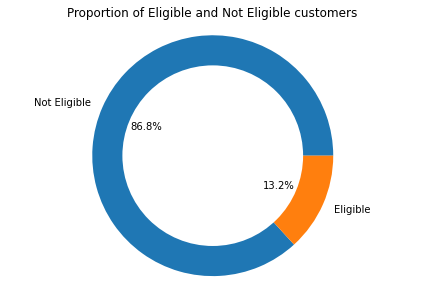

In [16]:
fig, ax = plt.subplots()
ax.pie(
    df1["Target"].value_counts(),
    labels = ["Not Eligible", "Eligible"],
    autopct = "%1.1f%%"
)

# Draw Circle
centre_circle = plt.Circle((0,0), 0.75, fc = "white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal Aspect Ratio ensures that Pie is drawn as a Circle
ax.axis("equal")
plt.tight_layout()
plt.title("Proportion of Eligible and Not Eligible customers")
plt.show()

> From the above chart we can say that the data is **imbalanced**.

# Feature Engineering

In [17]:
df.drop(["ID", "Phone", "Work_phone", "Email", "Unemployed"], axis = 1, inplace = True)

> Here we are dropping all the columns which are irrelevent for the credit card classification task, such as, "ID", "Phone", "Work_phone", "Email", "Unemployed".

In [18]:
df_num = df[[
    "Gender",
    "Own_car",
    "Own_property",
    "Num_children",
    "Num_family",
    "Account_length",
    "Total_income",
    "Age",
    "Years_employed"
]]

df_cat = df[[
    "Income_type",
    "Education_type",
    "Family_status",
    "Housing_type",
    "Occupation_type"
]]

df_res = df[[
    "Target"
]]

In [19]:
df_cat.head()

,Income_type,Education_type,Family_status,Housing_type,Occupation_type
0,Working,Higher education,Civil marriage,Rented apartment,Other
1,Working,Secondary / secondary special,Married,House / apartment,Security staff
2,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff
3,Pensioner,Higher education,Separated,House / apartment,Other
4,Working,Higher education,Married,House / apartment,Accountants


In [20]:
df_cat_conv = pd.get_dummies(df_cat, dtype = int)

In [21]:
df_cat_conv.head()

,Income_type_Commercial associate,Income_type_Pensioner,Income_type_State servant,Income_type_Student,Income_type_Working,Education_type_Academic degree,Education_type_Higher education,Education_type_Incomplete higher,Education_type_Lower secondary,Education_type_Secondary / secondary special,...,Occupation_type_Low-skill Laborers,Occupation_type_Managers,Occupation_type_Medicine staff,Occupation_type_Other,Occupation_type_Private service staff,Occupation_type_Realty agents,Occupation_type_Sales staff,Occupation_type_Secretaries,Occupation_type_Security staff,Occupation_type_Waiters/barmen staff
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


> Encoded categorical columns as numerical columns.

In [22]:
df_final = pd.concat([df_num, df_cat_conv, df_res], axis = 1)
df_final.head()

,Gender,Own_car,Own_property,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type_Commercial associate,...,Occupation_type_Managers,Occupation_type_Medicine staff,Occupation_type_Other,Occupation_type_Private service staff,Occupation_type_Realty agents,Occupation_type_Sales staff,Occupation_type_Secretaries,Occupation_type_Security staff,Occupation_type_Waiters/barmen staff,Target
0,1,1,1,0,2,15,427500.0,32.868574,12.435574,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,1,0,2,29,112500.0,58.793815,3.104787,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,1,4,270000.0,52.321403,8.353354,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,1,20,283500.0,61.504343,0.000000,0,...,0,0,1,0,0,0,0,0,0,0
4,1,1,1,0,2,5,270000.0,46.193967,2.105450,0,...,0,0,0,0,0,0,0,0,0,0


> Merged numerical columns with converted categorical columns.

In [23]:
scaler = StandardScaler()
X = scaler.fit_transform(df_final.iloc[:,:-1])
Y = df_final.iloc[:,-1].values

In [24]:
df_scaled = pd.DataFrame(X, columns = list(df_final.columns)[:-1])
df_scaled.head()

,Gender,Own_car,Own_property,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type_Commercial associate,...,Occupation_type_Low-skill Laborers,Occupation_type_Managers,Occupation_type_Medicine staff,Occupation_type_Other,Occupation_type_Private service staff,Occupation_type_Realty agents,Occupation_type_Sales staff,Occupation_type_Secretaries,Occupation_type_Security staff,Occupation_type_Waiters/barmen staff
0,1.366527,1.311338,0.699364,-0.551258,-0.195755,-0.737064,2.480773,-0.938956,1.067634,-0.559070,...,-0.074087,-0.295972,-0.175779,1.497604,-0.094535,-0.040629,-0.331059,-0.068996,-0.138216,-0.064319
1,1.366527,1.311338,0.699364,-0.551258,-0.195755,0.103918,-0.692321,1.291140,-0.403655,-0.559070,...,-0.074087,-0.295972,-0.175779,-0.667733,-0.094535,-0.040629,-0.331059,-0.068996,7.235064,-0.064319
2,-0.731782,-0.762580,0.699364,-0.551258,-1.267716,-1.397836,0.894226,0.734382,0.423945,1.788685,...,-0.074087,-0.295972,-0.175779,-0.667733,-0.094535,-0.040629,3.020610,-0.068996,-0.138216,-0.064319
3,-0.731782,-0.762580,0.699364,-0.551258,-1.267716,-0.436714,1.030216,1.524300,-0.893221,-0.559070,...,-0.074087,-0.295972,-0.175779,1.497604,-0.094535,-0.040629,-0.331059,-0.068996,-0.138216,-0.064319
4,1.366527,1.311338,0.699364,-0.551258,-0.195755,-1.337766,0.894226,0.207298,-0.561231,-0.559070,...,-0.074087,-0.295972,-0.175779,-0.667733,-0.094535,-0.040629,-0.331059,-0.068996,-0.138216,-0.064319


In [25]:
# df_final.mean()

In [26]:
# df_scaled.mean()

# Data Modelling

In [27]:
def fit_and_test_model(
    predictors_array,
    response_array,
    clf_model_name,
    test_percentage,
    imbalanced_class,
    imb_model_name
):
    X, Y = predictors_array, response_array

    clf_model_names = [
        "DecisionTreeClassifier",
        "LogisticRegression",
        "RandomForestClassifier"
    ]
    imb_model_names = [
        "RandomOverSampler",
        "RandomUnderSampler",
    ]
    if clf_model_name in clf_model_names:
        model = eval(clf_model_name + "()")
        if imbalanced_class:
            if imb_model_name in imb_model_names:
                imb_ = eval(imb_model_name + "()")

                X_New, Y_New = imb_.fit_resample(X, Y)
                X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_New, Y_New, test_size = test_percentage)

                model.fit(X_Train, Y_Train)
                Y_Pred = model.predict(X_Test)

                plt.figure(figsize = [8, 6])
                sns.heatmap(pd.DataFrame(confusion_matrix(Y_Test , Y_Pred)), annot = True, fmt = "d", cmap = "Blues")
                plt.xlabel("Predicted Class")
                plt.ylabel("Actual Class")
                plt.title("Confusion Matrix")
                plt.show()

                Area_Under_ROC_Curve = roc_auc_score(Y_Test , Y_Pred)

                fpr, tpr, _ = roc_curve(Y_Test , Y_Pred)
                plt.figure(figsize = [8, 6])
                plt.plot(fpr, tpr, "k-", label = f"AUC : {roc_auc_score(Y_Test , Y_Pred)}")
                plt.plot([0, 1], [0, 1], "k--")
                plt.xlim([-0.05, 1.05])
                plt.ylim([-0.05, 1.05])
                plt.xlabel("False Positive Rate")
                plt.ylabel("True Positive Rate")
                plt.title("Receiver Operating Characteristic (ROC) Curve")
                plt.legend(loc = "lower right")
                plt.show()

                return model, imb_, Area_Under_ROC_Curve
        else:
            X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = test_percentage)

            model.fit(X_Train, Y_Train)
            Y_Pred = model.predict(X_Test)

            plt.figure(figsize = [8, 6])
            sns.heatmap(pd.DataFrame(confusion_matrix(Y_Test , Y_Pred)), annot = True, fmt = "d", cmap = "Blues")
            plt.xlabel("Predicted Class")
            plt.ylabel("Actual Class")
            plt.title("Confusion Matrix")
            plt.show()

            Area_Under_ROC_Curve = roc_auc_score(Y_Test , Y_Pred)

            fpr, tpr, _ = roc_curve(Y_Test , Y_Pred)
            plt.figure(figsize = [8, 6])
            plt.plot(fpr, tpr, "k-", label = f"AUC : {roc_auc_score(Y_Test , Y_Pred)}")
            plt.plot([0, 1], [0, 1], "k--")
            plt.xlim([-0.05, 1.05])
            plt.ylim([-0.05, 1.05])
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.title("Receiver Operating Characteristic (ROC) Curve")
            plt.legend(loc = "lower right")
            plt.show()

            return model, None, Area_Under_ROC_Curve
    else:
        raise ValueError("Please Enter a Valid Model Name.")




Classification Model : LogisticRegression
Imbalanced Classification Sampling Technique : RandomUnderSampler




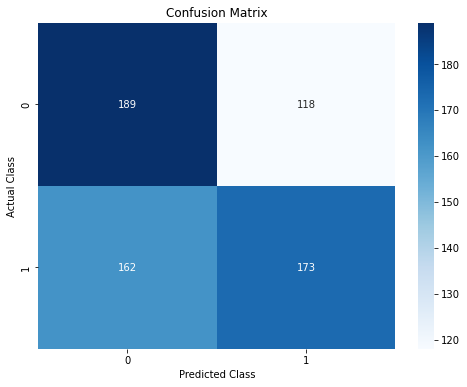

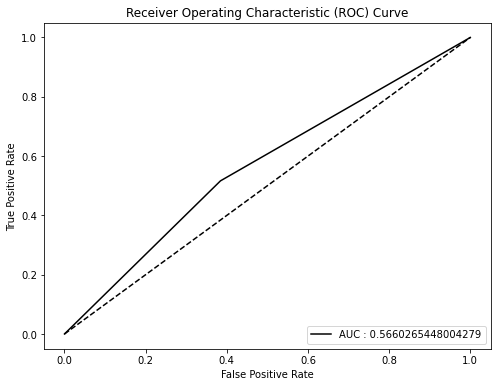




Classification Model : LogisticRegression
Imbalanced Classification Sampling Technique : RandomOverSampler




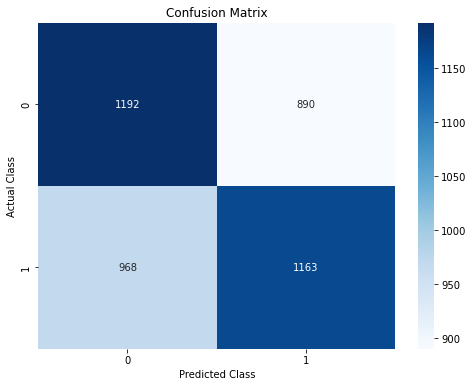

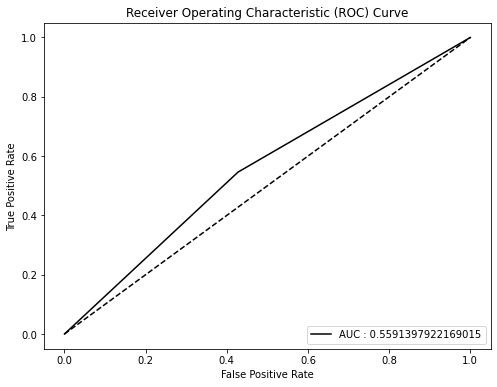




Classification Model : RandomForestClassifier
Imbalanced Classification Sampling Technique : RandomUnderSampler




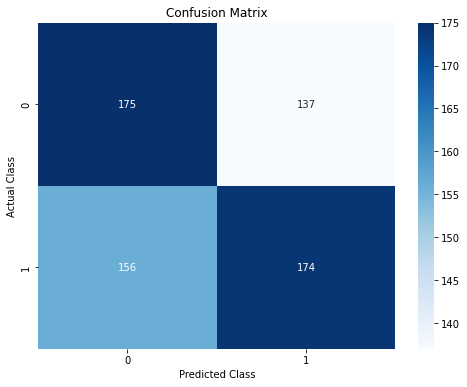

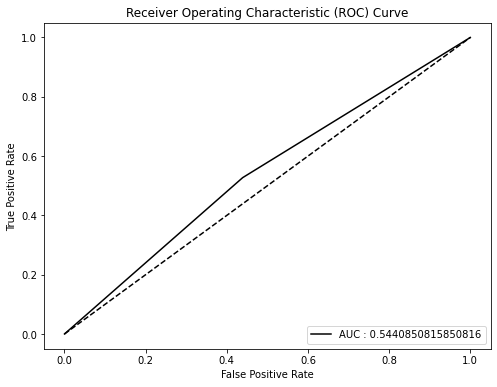




Classification Model : RandomForestClassifier
Imbalanced Classification Sampling Technique : RandomOverSampler




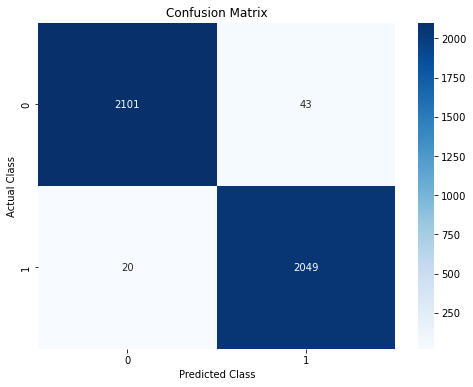

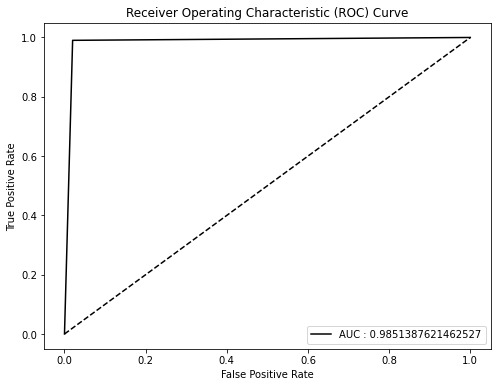




Classification Model : DecisionTreeClassifier
Imbalanced Classification Sampling Technique : RandomUnderSampler




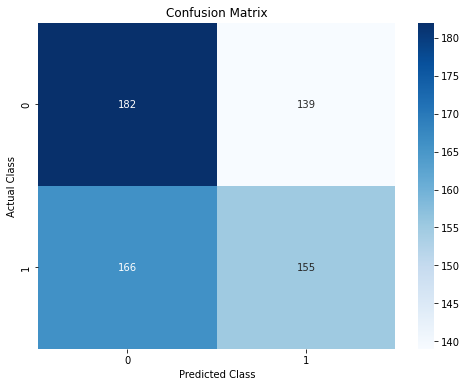

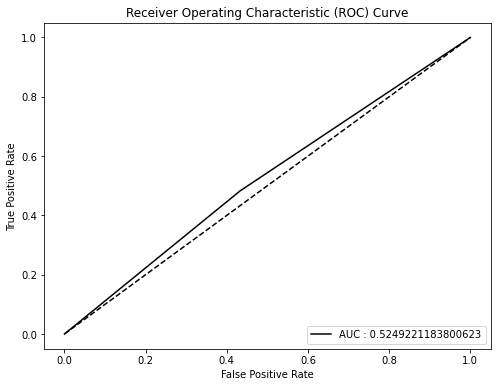




Classification Model : DecisionTreeClassifier
Imbalanced Classification Sampling Technique : RandomOverSampler




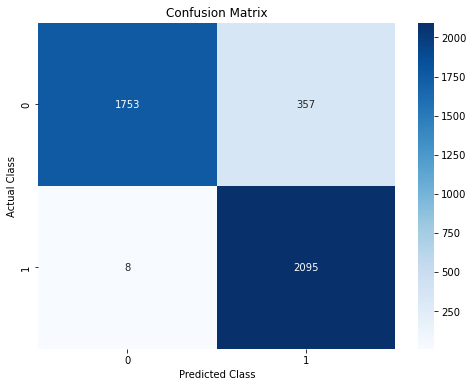

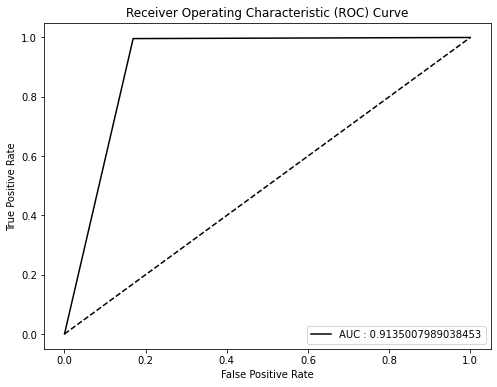

In [28]:
clf_model_names = ["LogisticRegression", "RandomForestClassifier", "DecisionTreeClassifier"]
imb_model_names = ["RandomUnderSampler", "RandomOverSampler"]
final_clf_model, final_imb_model, final_auc_score = None, None, 0
for clf_model_name in clf_model_names:
    for imb_model_name in imb_model_names:
        print("\n\n")
        print(f"Classification Model : {clf_model_name}")
        print(f"Imbalanced Classification Sampling Technique : {imb_model_name}")
        print("\n")
        clf_model_, imb_model_, auc_score_ = fit_and_test_model(
            predictors_array = X,
            response_array = Y,
            clf_model_name = clf_model_name,
            test_percentage = 0.25,
            imbalanced_class = True,


            imb_model_name  = imb_model_name
        )
        if auc_score_ > final_auc_score:
            final_clf_model, final_imb_model, final_auc_score = clf_model_, imb_model_, auc_score_

# Best Model Result

In [29]:
print(f"Best Classification Model : {final_clf_model}")
print(f"Best Imbalanced Data Sampling Technique : {final_imb_model}")
print(f"Best AUC Score : {final_auc_score}")

Best Classification Model : RandomForestClassifier()
Best Imbalanced Data Sampling Technique : RandomOverSampler()
Best AUC Score : 0.9851387621462527


In [30]:
X_Final, Y_Final = final_imb_model.fit_resample(X, Y)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Final, Y_Final, test_size = 0.25)
final_clf_model.fit(X_Train, Y_Train)
Y_Pred = final_clf_model.predict(X_Test)

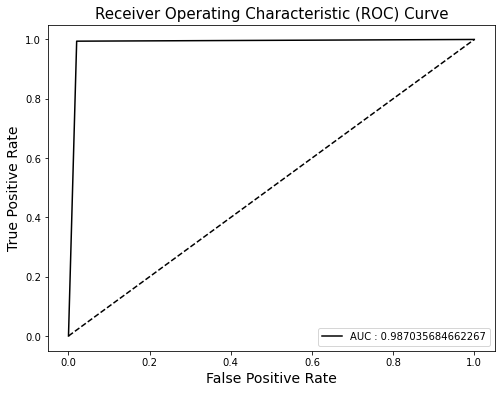

In [31]:
fpr, tpr, _ = roc_curve(Y_Test , Y_Pred)
plt.figure(figsize = [8, 6])
plt.plot(fpr, tpr, "k-", label = f"AUC : {roc_auc_score(Y_Test , Y_Pred)}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate", size = 14)
plt.ylabel("True Positive Rate", size = 14)
plt.title("Receiver Operating Characteristic (ROC) Curve", size = 15)
plt.legend(loc = "lower right")
plt.show()

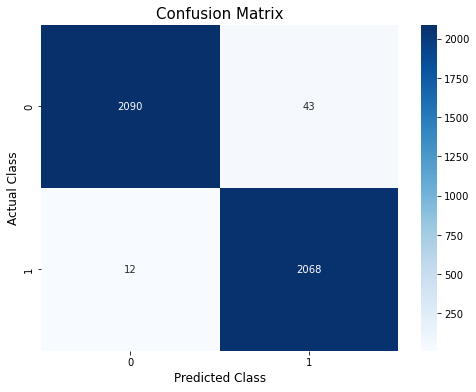

In [32]:
plt.figure(figsize = [8, 6])
sns.heatmap(pd.DataFrame(confusion_matrix(Y_Test , Y_Pred)), annot = True, fmt = "d", cmap = "Blues")
plt.xlabel("Predicted Class", size = 12)
plt.ylabel("Actual Class", size = 12)
plt.title("Confusion Matrix", size = 15)
plt.show()

In [33]:
print(
"For the Final Model, \n\n"
f" Accuracy   :  {accuracy_score(Y_Test , Y_Pred)}\n"
f" Precision  :  {precision_score(Y_Test , Y_Pred)}\n"
f" Recall     :  {recall_score(Y_Test , Y_Pred)}\n"
f" F1 Score   :  {f1_score(Y_Test , Y_Pred)}\n\n"
"and a detail Classification Report is given below: \n\n"
f"{classification_report(Y_Test, Y_Pred, target_names = ['Not Eligible (0)', 'Eligible (1)'], digits = 4)}"
)

For the Final Model, 

 Accuracy   :  0.9869451697127938
 Precision  :  0.9796305068687826
 Recall     :  0.9942307692307693
 F1 Score   :  0.9868766404199475

and a detail Classification Report is given below: 

                  precision    recall  f1-score   support

Not Eligible (0)     0.9943    0.9798    0.9870      2133
    Eligible (1)     0.9796    0.9942    0.9869      2080

        accuracy                         0.9869      4213
       macro avg     0.9870    0.9870    0.9869      4213
    weighted avg     0.9871    0.9869    0.9869      4213

